# S09 T01: Practicant amb training i test sets

## Nivell 1. Exercici 1. Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [1]:
# Pandas for managing datasets
import pandas as pd
import numpy as np

# Matplotlib for additional customization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns

#preprocessing and analysis
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

## Nivell 0: We Should first clean the data, handle missing values and categorical features, and then we should split into training and testing data.

In [2]:
vuelos = pd.read_csv("DelayedFlights.csv")
vuelos.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
vuelos.info()   # para ver todas las variables y el tipo de datos que contienen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [5]:
vuelos.isna().sum()  # visualizamos los elementos nulos para cada variable

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

Variables Description

- Year. year of the flight (stored as factor).

- Month. month of the flight (stored as factor).

- DayOfMonth. day of the month (1 to 31) (stored as integer).

- DayOfWeek. day of the week (stored as factor).

- DepTime. actual departure time (stored as float).

- CRSDepTime. scheduled departure time (stored as float).

- ArrTime. actual arrival time (stored as float).

- CRSArrTime. scheduled arrival time (stored as float).

- UniqueCarrier. carrier ID (stored as factor).

- FlightNum. flight number (stored as factor).

- TailNum. plane's tail number (stored as factor).

- ActualElapsedTime. actual elapsed time of the flight, in minutes (stored as integer).

- CRSElapsedTime. scheduled elapsed time of the flight, in minutes (stored as integer).

- AirTime. airborne time for the flight, in minutes (stored as integer).

- ArrDelay. arrival delay, in minutes (stored as integer).

- DepDelay. departure delay, in minutes (stored as integer).

- Origin. originating airport (stored as factor).

- Dest. destination airport (stored as factor).

- Distance. flight distance (stored as integer).

- TaxiIn. taxi time from wheels down to arrival at the gate, in minutes (stored as integer).

- TaxiOut. taxi time from departure from the gate to wheels up, in minutes (stored as integer).

- Cancelled. cancellation status (stored as logical).

- CancellationCode. cancellation code, if applicable (stored as factor).

- Diverted. diversion status (stored as logical).

- CarrierDelay. delay, in minutes, attributable to the carrier (stored integer).

- WeatherDelay. delay, in minutes, attributable to weather factors (stored as integer).

- NASDelay. delay, in minutes, attributable to the National Aviation System (stored as integer).

- SecurityDelay. delay, in minutes, attributable to security factors (stored as integer).

- LateAircraftDelay. delay, in minutes, attributable to late-arriving aircraft (stored as integer).

__Source__

__AirlineData87to08: Airline On-Time Performance Data__ https://docs.microsoft.com/en-us/machine-learning-server/r-reference/revoscaler/airlinedata87to08

In [6]:
#elimino las columnas que creo que no interesan para el análisis
# Year, because is 2008 for all the DF
# Cancelled, has the value 0 for all the DF
df = vuelos.drop(["Unnamed: 0" ,"TaxiIn", "TaxiOut", "FlightNum", "Diverted","TailNum","Year", "Cancelled", "CancellationCode"], axis=1)
df.shape

(1936758, 21)

In [7]:
df.isna().sum().median()

0.0

In [8]:
# Deleting rows with null data, based on ArrDelay variable

df.dropna(subset=["ArrDelay"], inplace=True)
df.isna().sum()

# We are going to do a comparison using the last five variables related to delay categories 

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

In [9]:
# Visualizing descriptive statistics for the five variables
round(df[["Origin","Dest","Distance","ArrDelay","DepDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]].describe(), 2)

,Distance,ArrDelay,DepDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1928371.00,1928371.00,1928371.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,764.95,42.20,43.09,3.70,15.02,0.09,25.30
std,573.89,56.78,53.27,21.49,33.83,2.02,42.05
min,11.00,-109.00,6.00,0.00,0.00,0.00,0.00
25%,338.00,9.00,12.00,0.00,0.00,0.00,0.00
50%,606.00,24.00,24.00,0.00,2.00,0.00,8.00
75%,997.00,56.00,53.00,0.00,15.00,0.00,33.00
max,4962.00,2461.00,2467.00,1352.00,1357.00,392.00,1316.00


In [10]:
# Creating a new variable with the sum of all the five
# We verify that ArrDelay is exactly the same that the new variable created. 
# The sum of all the Delay categories are equal to ArrDelay
df["TotalDelay"] = df["CarrierDelay"]+df["WeatherDelay"]+df["NASDelay"]+df["SecurityDelay"]+df["LateAircraftDelay"]
    
df[["TotalDelay","ArrDelay"]]   


,TotalDelay,ArrDelay
0,NaN,-14.0
1,NaN,2.0
2,NaN,14.0
3,34.0,34.0
4,NaN,11.0
...,...,...
1936753,25.0,25.0
1936754,75.0,75.0
1936755,99.0,99.0
1936756,NaN,9.0


In [11]:
# So, is not neccesary to delete NaN rows in all these variables.
# We just need to replace NaN for 0, in order to have a valid value.

df["CarrierDelay"].fillna(0, inplace = True)
df["WeatherDelay"].fillna(0, inplace = True)
df["NASDelay"].fillna(0, inplace = True)
df["SecurityDelay"].fillna(0, inplace = True)
df["LateAircraftDelay"].fillna(0, inplace = True)
df[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]]

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,32.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
1936753,3.0,0.0,0.0,0.0,22.0
1936754,0.0,57.0,18.0,0.0,0.0
1936755,1.0,0.0,19.0,0.0,79.0
1936756,0.0,0.0,0.0,0.0,0.0


In [12]:
# Drop the variable we created for the comparison (TotalDelay)
del df['TotalDelay']
df.isna().sum()  

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

Text(0.5, 1.0, 'Delay arrivals distribution')

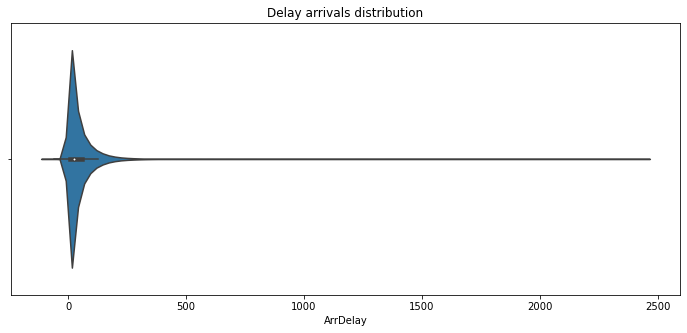

In [13]:
# Visualizing ArrDelay distribution
# The mean of delay is 42,20 min. but there are outliers that have a máx. of 2467 min.
f, ax = plt.subplots(figsize=(12, 5))
sns.violinplot(data=df, x='ArrDelay')
plt.title("Delay arrivals distribution")


In [14]:
# The main delay reasons (in minutes) 
reasons_delay = df[["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]
reasons_delay.sum().sort_values(ascending=False)

LateAircraftDelay    31557038.0
CarrierDelay         23926070.0
NASDelay             18739310.0
WeatherDelay          4620160.0
SecurityDelay          112445.0
dtype: float64

<ipython-input-15-eb0e4dfddc75>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corrmat, dtype=np.bool)


Text(0.5, 1.0, 'Correlation matrix')

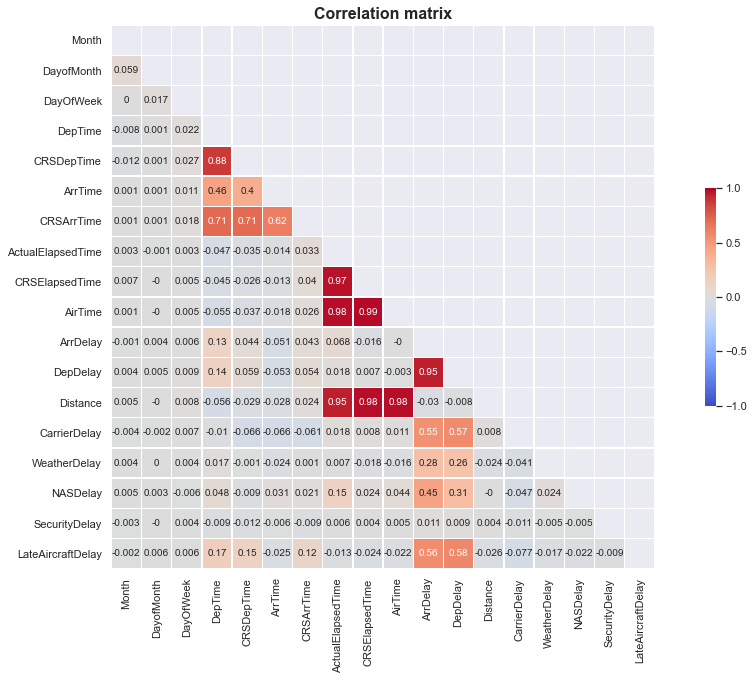

In [15]:
# Correlation matrix show us if two variables have a linear relationship and the strength of that relationship.
sns.set_theme()
corrmat = round(df.corr(),3)
f, ax = plt.subplots(figsize=(18, 10))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(corrmat, 
                      mask = mask,
                      square =True,
                      linewidths = .5,
                      ax=ax,
                      cmap = "coolwarm",
                      cbar_kws = {'shrink': .4, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})
plt.title("Correlation matrix", fontsize=16, fontweight="bold")

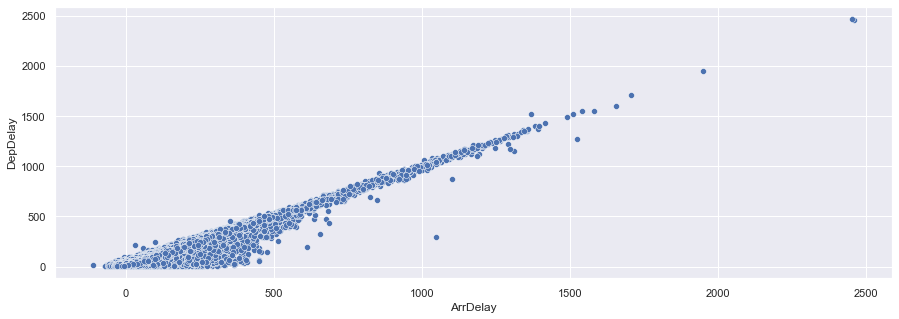

In [16]:
# The distribution of departure and arrivals delay shows a positive relation between both variables.
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=df, x="ArrDelay", y="DepDelay");

# It shows a positive relation between the two variables, as the correlation graphic already shows.

## Nivell 1. Exercici 1
### Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [17]:
round(df.describe(), 2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00,1928371.00
mean,6.11,15.75,3.98,1518.65,1467.72,1610.24,1634.20,133.31,134.20,108.28,42.20,43.09,764.95,12.41,2.40,9.72,0.06,16.36
std,3.48,8.78,2.00,450.44,424.73,548.00,464.63,72.06,71.23,68.64,56.78,53.27,573.89,36.20,17.38,28.14,1.63,35.92
min,1.00,1.00,1.00,1.00,0.00,1.00,0.00,14.00,-21.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,80.00,82.00,58.00,9.00,12.00,338.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,116.00,116.00,90.00,24.00,24.00,606.00,0.00,0.00,0.00,0.00,0.00
75%,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,165.00,165.00,137.00,56.00,53.00,997.00,10.00,0.00,6.00,0.00,18.00
max,12.00,31.00,7.00,2400.00,2359.00,2400.00,2359.00,1114.00,660.00,1091.00,2461.00,2467.00,4962.00,2436.00,1352.00,1357.00,392.00,1316.00


In [18]:
# Train and test exercise
train, test = train_test_split(df, test_size=0.33)
print("sample size for train (67%): ", len(train))
print("sample size for test (33%): ", len(test))
print("Both samples have the correct distribution")

sample size for train (67%):  1292008
sample size for test (33%):  636363
Both samples have the correct distribution


In [19]:
round(train.describe(),2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00,1292008.00
mean,6.11,15.75,3.98,1518.63,1467.80,1610.12,1634.23,133.27,134.15,108.24,42.20,43.09,764.62,12.42,2.39,9.70,0.06,16.38
std,3.48,8.78,2.00,450.53,424.79,548.13,464.64,72.05,71.20,68.61,56.79,53.27,573.56,36.19,17.27,28.17,1.64,35.94
min,1.00,1.00,1.00,1.00,0.00,1.00,0.00,15.00,1.00,0.00,-70.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,80.00,81.00,58.00,9.00,12.00,338.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,116.00,116.00,90.00,24.00,24.00,606.00,0.00,0.00,0.00,0.00,0.00
75%,9.00,23.00,6.00,1900.00,1815.00,2030.00,2015.00,165.00,165.00,137.00,56.00,53.00,997.00,10.00,0.00,6.00,0.00,18.00
max,12.00,31.00,7.00,2400.00,2359.00,2400.00,2359.00,790.00,660.00,655.00,2461.00,2467.00,4962.00,2436.00,1297.00,1357.00,357.00,1316.00


In [20]:
round(test.describe(),2)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,636363.00,636363.00,636363.00,636363.00,636363.00,636363.00,636363.00,636363.00,636363.00,636363.00,636363.00,636363.00,636363.00,636363.00,636363.00,636363.00,636363.00,636363.00
mean,6.11,15.75,3.99,1518.69,1467.54,1610.49,1634.12,133.39,134.29,108.36,42.20,43.10,765.61,12.39,2.41,9.75,0.06,16.34
std,3.48,8.78,2.00,450.25,424.61,547.75,464.61,72.08,71.30,68.71,56.78,53.25,574.54,36.24,17.59,28.09,1.61,35.89
min,1.00,1.00,1.00,1.00,1.00,1.00,0.00,14.00,-21.00,0.00,-109.00,6.00,11.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,80.00,82.00,58.00,9.00,12.00,338.00,0.00,0.00,0.00,0.00,0.00
50%,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,116.00,116.00,90.00,24.00,24.00,607.00,0.00,0.00,0.00,0.00,0.00
75%,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,165.00,165.00,137.00,56.00,53.00,998.00,10.00,0.00,6.00,0.00,18.00
max,12.00,31.00,7.00,2400.00,2359.00,2400.00,2359.00,1114.00,660.00,1091.00,1707.00,1710.00,4962.00,1707.00,1352.00,1195.00,392.00,1236.00


##### Descriptive statistics are close similar in both samples
##### Taking only two variables, we can check it graphically.

Text(0.5, 1.0, 'Train sample')

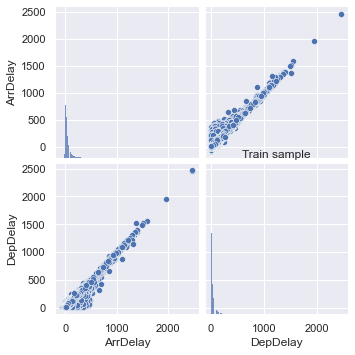

In [21]:
sns.pairplot(train[['ArrDelay','DepDelay']])
plt.title('Train sample')

Text(0.5, 1.0, 'Test sample')

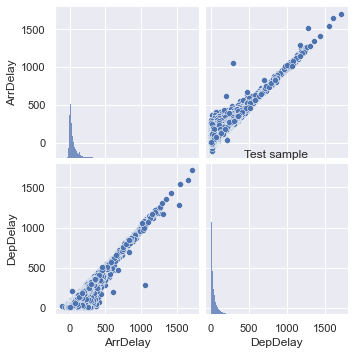

In [22]:
sns.pairplot(test[['ArrDelay','DepDelay']])
plt.title('Test sample')

## Nivell 2. Exercici 2
### Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [23]:
numeric_var = ['DepTime','CRSDepTime','CRSArrTime','ArrTime','DepDelay' ,'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       ]
ordinal_var = ['Month', 'DayofMonth', 'DayOfWeek']

nominal_var = ['UniqueCarrier', 'Origin', 'Dest']

In [24]:
# Standarizing numeric variables with StandardScaler

#train
ss = StandardScaler()
train[numeric_var] = ss.fit_transform(train[numeric_var])
train[numeric_var]

<ipython-input-24-c92bb6679afc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[numeric_var] = ss.fit_transform(train[numeric_var])
C:\Users\nuyan\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,DepTime,CRSDepTime,CRSArrTime,ArrTime,DepDelay,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
269535,-1.499645,-1.489696,-1.031415,-0.839440,-0.658638,-0.831174,-0.343129,-0.138222,-0.344494,-0.035876,-0.455724
1270780,0.260523,0.381827,0.604270,0.563523,-0.696181,-0.672688,-0.343129,-0.138222,-0.344494,-0.035876,-0.455724
654160,-1.029083,-1.002394,-0.915195,-0.708083,-0.564781,-0.514201,-0.343129,-0.138222,-0.344494,-0.035876,-0.455724
1267334,-1.126747,-1.277826,-1.268158,-0.855860,0.054678,0.243012,-0.343129,2.525372,0.010530,-0.035876,-0.455724
270246,0.908655,1.040980,0.873298,0.791573,-0.470923,-0.672688,-0.343129,-0.138222,-0.344494,-0.035876,-0.455724
...,...,...,...,...,...,...,...,...,...,...,...
1429557,-1.060158,-1.018873,-1.074459,-0.872279,-0.696181,-0.795955,-0.343129,-0.138222,-0.344494,-0.035876,-0.455724
1255220,-0.156768,-0.324408,0.356765,0.443112,0.655366,0.190183,-0.343129,-0.138222,1.537134,-0.035876,-0.455724
859074,-0.380951,-0.383261,0.464376,0.581767,-0.020407,-0.056351,-0.094410,-0.138222,-0.344494,-0.035876,0.379093
1704021,0.475827,0.605468,0.673141,0.632850,-0.658638,-0.567030,-0.343129,-0.138222,-0.344494,-0.035876,-0.455724


In [25]:
#test
ss = StandardScaler()
test[numeric_var] = ss.fit_transform(test[numeric_var])
test[numeric_var]

<ipython-input-25-b5235e63ecfb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[numeric_var] = ss.fit_transform(test[numeric_var])
C:\Users\nuyan\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,DepTime,CRSDepTime,CRSArrTime,ArrTime,DepDelay,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1664238,-1.289696,-1.327207,-1.332558,-1.057957,-0.170899,-0.461425,0.099624,-0.137199,-0.346921,-0.035737,-0.455271
1475235,0.307187,0.406162,0.595939,0.581485,-0.490128,-0.426201,0.127216,-0.137199,-0.311327,-0.035737,-0.455271
328294,1.102298,1.065596,0.690642,0.895499,0.223444,0.419171,-0.341849,-0.137199,0.044609,-0.035737,1.077194
804458,-0.858827,-0.830276,-0.813844,-0.544947,-0.490128,-0.461425,0.099624,-0.137199,-0.346921,-0.035737,-0.455271
400680,-0.865489,-1.030462,-0.665333,-0.371509,0.298556,-0.003515,0.817018,-0.137199,-0.346921,-0.035737,-0.455271
...,...,...,...,...,...,...,...,...,...,...,...
770689,0.629229,0.662870,0.434513,0.446387,-0.565241,-0.408590,0.182400,-0.137199,-0.346921,-0.035737,-0.455271
18094,-0.687811,-0.736072,-0.450099,-0.360555,-0.546463,-0.954559,-0.341849,-0.137199,-0.346921,-0.035737,-0.455271
777653,-0.416852,-0.507625,-0.633048,-0.331345,-0.077008,0.119768,0.734241,-0.137199,0.009015,-0.035737,-0.455271
1764580,0.960155,0.888962,1.013493,1.103624,0.430004,0.489618,-0.176297,-0.137199,-0.204546,-0.035737,1.216509


In [26]:
# Transform ordinal variables with OrdinalEncoder

#train
enc = OrdinalEncoder()
train[ordinal_var] = enc.fit_transform(train[ordinal_var])
train[ordinal_var]

<ipython-input-26-dca1039b25a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[ordinal_var] = enc.fit_transform(train[ordinal_var])
C:\Users\nuyan\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Month,DayofMonth,DayOfWeek
269535,1.0,7.0,4.0
1270780,7.0,6.0,3.0
654160,3.0,2.0,3.0
1267334,7.0,3.0,0.0
270246,1.0,10.0,0.0
...,...,...,...
1429557,8.0,4.0,4.0
1255220,6.0,19.0,6.0
859074,4.0,3.0,6.0
1704021,10.0,25.0,2.0


In [27]:
#test
enc = OrdinalEncoder()
test[ordinal_var] = enc.fit_transform(test[ordinal_var])
test[ordinal_var]

<ipython-input-27-5ce90028079a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[ordinal_var] = enc.fit_transform(test[ordinal_var])
C:\Users\nuyan\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Month,DayofMonth,DayOfWeek
1664238,10.0,15.0,6.0
1475235,8.0,17.0,3.0
328294,1.0,5.0,2.0
804458,4.0,25.0,0.0
400680,2.0,22.0,6.0
...,...,...,...
770689,4.0,15.0,4.0
18094,0.0,19.0,6.0
777653,4.0,3.0,6.0
1764580,11.0,25.0,4.0


In [28]:
# dummy transformation for nominal variables y concatenamos
# TRAIN
a_train = pd.get_dummies(train["UniqueCarrier"])
b_train = pd.get_dummies(train["Origin"])
c_train = pd.get_dummies(train["Dest"])
frames = [a_train, b_train, c_train]
train_nominal = pd.concat(frames, sort= False, axis=1)
train_nominal

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
269535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1270780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
654160,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1267334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1255220,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859074,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1704021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# dummy transformation for nominal variables y concatenamos
# TEST
a_test = pd.get_dummies(test["UniqueCarrier"])
b_test = pd.get_dummies(test["Origin"])
c_test = pd.get_dummies(test["Dest"])
frames = [a_test, b_test, c_test]
test_nominal = pd.concat(frames, sort= False, axis=1)
test_nominal

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
1664238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1475235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328294,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
804458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
400680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770689,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
777653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1764580,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Concatenating  train transformed dataframes
df_1 = train[numeric_var]
df_2 = train[ordinal_var]
df_3 = train_nominal

frames = [df_1, df_2, df_3]
newdf_train = pd.concat(frames, sort=False, axis = 1)
newdf_train

,DepTime,CRSDepTime,CRSArrTime,ArrTime,DepDelay,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
269535,-1.499645,-1.489696,-1.031415,-0.839440,-0.658638,-0.831174,-0.343129,-0.138222,-0.344494,-0.035876,...,0,0,0,0,0,0,0,0,0,0
1270780,0.260523,0.381827,0.604270,0.563523,-0.696181,-0.672688,-0.343129,-0.138222,-0.344494,-0.035876,...,0,0,0,0,0,0,0,0,0,0
654160,-1.029083,-1.002394,-0.915195,-0.708083,-0.564781,-0.514201,-0.343129,-0.138222,-0.344494,-0.035876,...,0,0,0,0,0,0,0,0,0,0
1267334,-1.126747,-1.277826,-1.268158,-0.855860,0.054678,0.243012,-0.343129,2.525372,0.010530,-0.035876,...,0,0,0,0,0,0,0,0,0,0
270246,0.908655,1.040980,0.873298,0.791573,-0.470923,-0.672688,-0.343129,-0.138222,-0.344494,-0.035876,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429557,-1.060158,-1.018873,-1.074459,-0.872279,-0.696181,-0.795955,-0.343129,-0.138222,-0.344494,-0.035876,...,0,0,0,0,0,0,0,0,0,0
1255220,-0.156768,-0.324408,0.356765,0.443112,0.655366,0.190183,-0.343129,-0.138222,1.537134,-0.035876,...,0,0,0,0,0,0,0,0,0,0
859074,-0.380951,-0.383261,0.464376,0.581767,-0.020407,-0.056351,-0.094410,-0.138222,-0.344494,-0.035876,...,0,0,0,0,0,0,0,0,0,0
1704021,0.475827,0.605468,0.673141,0.632850,-0.658638,-0.567030,-0.343129,-0.138222,-0.344494,-0.035876,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#concatenating test transformed dataframes

df_4 = test[numeric_var]
df_5 = test[ordinal_var]
df_6 = test_nominal

frames = [df_4, df_5, df_6]
newdf_test = pd.concat(frames, sort=False, axis = 1)
newdf_test

,DepTime,CRSDepTime,CRSArrTime,ArrTime,DepDelay,ArrDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,...,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
1664238,-1.289696,-1.327207,-1.332558,-1.057957,-0.170899,-0.461425,0.099624,-0.137199,-0.346921,-0.035737,...,0,0,0,0,0,0,0,0,0,0
1475235,0.307187,0.406162,0.595939,0.581485,-0.490128,-0.426201,0.127216,-0.137199,-0.311327,-0.035737,...,0,0,0,0,0,0,0,0,0,0
328294,1.102298,1.065596,0.690642,0.895499,0.223444,0.419171,-0.341849,-0.137199,0.044609,-0.035737,...,0,0,0,0,0,0,0,0,0,0
804458,-0.858827,-0.830276,-0.813844,-0.544947,-0.490128,-0.461425,0.099624,-0.137199,-0.346921,-0.035737,...,0,0,0,0,0,0,0,0,0,0
400680,-0.865489,-1.030462,-0.665333,-0.371509,0.298556,-0.003515,0.817018,-0.137199,-0.346921,-0.035737,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770689,0.629229,0.662870,0.434513,0.446387,-0.565241,-0.408590,0.182400,-0.137199,-0.346921,-0.035737,...,0,0,0,0,0,0,0,0,0,0
18094,-0.687811,-0.736072,-0.450099,-0.360555,-0.546463,-0.954559,-0.341849,-0.137199,-0.346921,-0.035737,...,0,0,0,0,0,0,0,0,0,0
777653,-0.416852,-0.507625,-0.633048,-0.331345,-0.077008,0.119768,0.734241,-0.137199,0.009015,-0.035737,...,0,0,0,0,0,0,0,0,0,0
1764580,0.960155,0.888962,1.013493,1.103624,0.430004,0.489618,-0.176297,-0.137199,-0.204546,-0.035737,...,0,0,0,0,0,0,0,0,0,0


## Nivell 3. Exercici 3
### Resumeix les noves columnes generades de manera estadística i gràfica 

In [32]:
round(newdf_train.describe().transpose(),3)

,count,mean,std,min,25%,50%,75%,max
DepTime,1292008.0,-0.000,1.000,-3.369,-0.701,0.059,0.847,1.956
CRSDepTime,1292008.0,0.000,1.000,-3.455,-0.783,0.099,0.817,2.098
CRSArrTime,1292008.0,-0.000,1.000,-3.517,-0.666,0.152,0.819,1.560
ArrTime,1292008.0,0.000,1.000,-2.936,-0.537,0.191,0.766,1.441
DepDelay,1292008.0,-0.000,1.000,-0.696,-0.584,-0.358,0.186,45.500
...,...,...,...,...,...,...,...,...
WYS,1292008.0,0.000,0.004,0.000,0.000,0.000,0.000,1.000
XNA,1292008.0,0.002,0.046,0.000,0.000,0.000,0.000,1.000
YAK,1292008.0,0.000,0.011,0.000,0.000,0.000,0.000,1.000
YKM,1292008.0,0.000,0.005,0.000,0.000,0.000,0.000,1.000


In [33]:
round(newdf_test.describe().transpose(),3)

,count,mean,std,min,25%,50%,75%,max
DepTime,636363.0,-0.000,1.000,-3.371,-0.701,0.058,0.847,1.957
CRSDepTime,636363.0,0.000,1.000,-3.454,-0.783,0.100,0.818,2.099
CRSArrTime,636363.0,-0.000,1.000,-3.517,-0.665,0.153,0.818,1.560
ArrTime,636363.0,0.000,1.000,-2.938,-0.538,0.191,0.766,1.441
DepDelay,636363.0,-0.000,1.000,-0.697,-0.584,-0.359,0.186,31.301
...,...,...,...,...,...,...,...,...
WYS,636363.0,0.000,0.004,0.000,0.000,0.000,0.000,1.000
XNA,636363.0,0.002,0.047,0.000,0.000,0.000,0.000,1.000
YAK,636363.0,0.000,0.012,0.000,0.000,0.000,0.000,1.000
YKM,636363.0,0.000,0.005,0.000,0.000,0.000,0.000,1.000


##### All the numeric variables have the value of 1 as standard deviation and 0 as a mean, in both cases: train and test sample, as a result of the standarization processing.
##### The rest of variables are close, train and test, in values 

In [34]:
# Finally we have a comparison between variables train and test.

def comparison(newdf_train, newdf_test, variable):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12.5, 2.5)
    fig.suptitle("Comparison train and test data: " + variable)
    sns.kdeplot(data=newdf_train, x=variable, ax=ax1).set_ylabel("Train distribution")
    sns.kdeplot(data=newdf_test, x=variable, ax=ax2).set_ylabel("Test distribution")


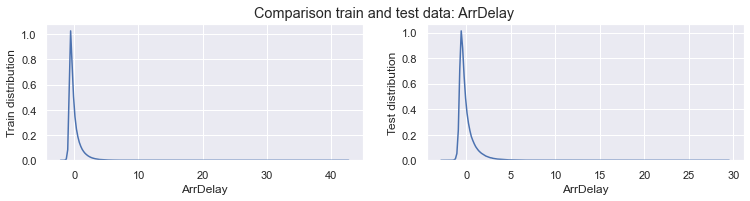

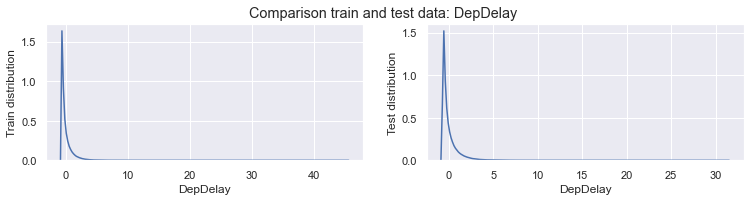

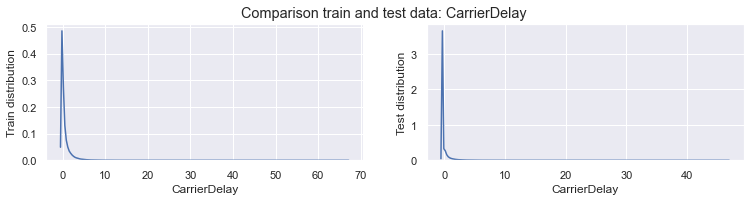

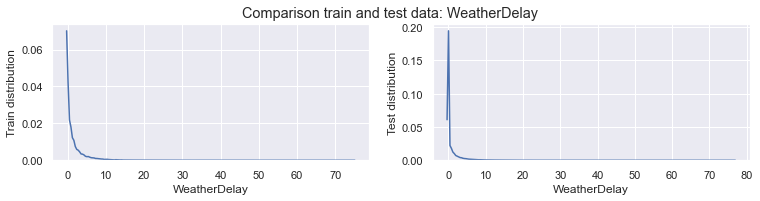

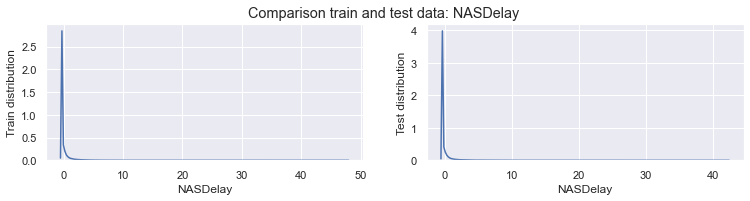

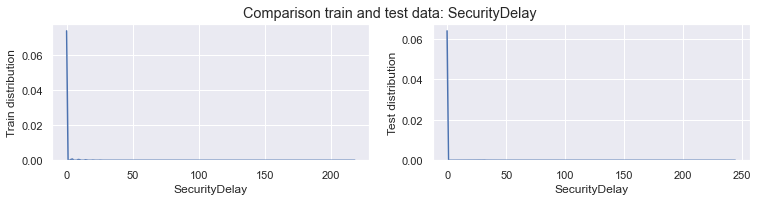

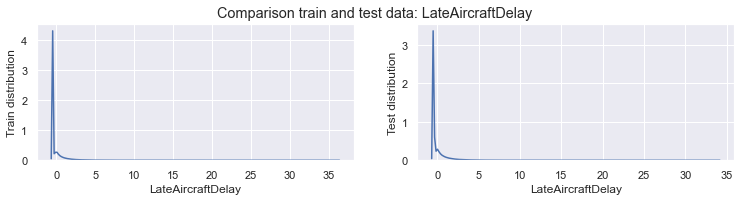

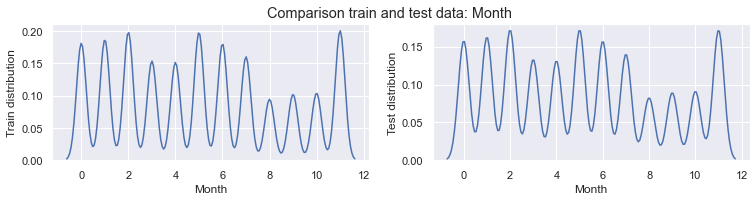

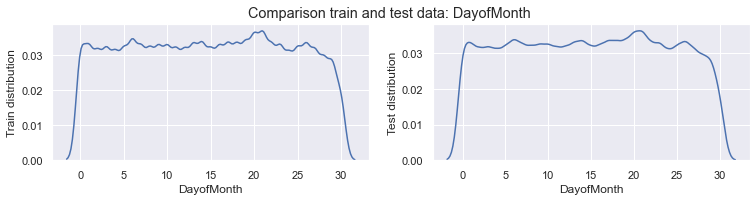

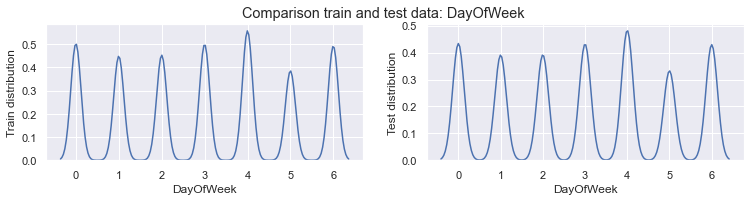

In [35]:
# We selected only some variables in order to see the differences.
comparison(newdf_train, newdf_test, "ArrDelay")
comparison(newdf_train, newdf_test, "DepDelay")
comparison(newdf_train, newdf_test, "CarrierDelay")
comparison(newdf_train, newdf_test, "WeatherDelay")
comparison(newdf_train, newdf_test, "NASDelay")
comparison(newdf_train, newdf_test, "SecurityDelay")
comparison(newdf_train, newdf_test, "LateAircraftDelay")
comparison(newdf_train, newdf_test, "Month")
comparison(newdf_train, newdf_test, "DayofMonth")
comparison(newdf_train, newdf_test, "DayOfWeek")
plt.savefig("train&test.png")

##### We did the comparison between train and test variables and there are close simirlar.
##### We did not applyied normalization processing,  that's why we can see a right skewed distribution in most of the variables (tail in on the right side)